In [3]:
import pickle
import sys
sys.path.append("..")
from model import *
import cPickle as pickle
from theano.misc.pkl_utils import load, dump, PersistentCudaNdarrayID
import numpy as np
import pandas as pd

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)
/home/sturm/projects/subcellular_localization/venv/local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/sturm/projects/subcellular_localization/venv/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [4]:
val_fn = pickle.load(open("../models/fold_1_val_fn.pickle", 'rb'))

In [5]:
traind = np.load("../data/train.npz")

In [6]:
list(traind)

['mask_train', 'partition', 'X_train', 'y_train']

In [7]:
traind['X_train'].shape

(4763, 1000, 20)

In [8]:
traind['X_train'][0,5]

array([0.49, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.51, 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

In [9]:
testd = np.load("../data/test.npz")

In [10]:
list(testd)

['X_test', 'mask_test', 'y_test']

In [11]:
inputs = testd['X_test']
targets = testd['y_test']
in_masks = testd['mask_test']

In [12]:
inputs[:128].shape

(128, 1000, 20)

In [13]:
targets.shape

(1195,)

In [14]:
in_masks[:128].shape

(128, 1000)

In [15]:
err, net_out, alpha, context, sigmoid, net_id = val_fn(inputs[-128:], targets[-128:], in_masks[-128:])

In [16]:
targets[-128:]

array([9, 9, 2, 2, 2, 2, 1, 1, 6, 6, 7, 1, 1, 0, 0, 8, 8, 4, 4, 3, 9, 1,
       2, 2, 5, 2, 4, 2, 2, 5, 0, 4, 4, 2, 2, 4, 4, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 3, 8, 8, 2, 2, 3, 3, 7, 1, 7, 1, 4, 4, 0, 0, 8, 8,
       4, 4, 1, 3, 2, 2, 0, 5, 5, 2, 4, 4, 4, 4, 6, 6, 6, 6, 3, 1, 1, 8,
       0, 0, 1, 1, 1, 4, 4, 0, 0, 7, 4, 4, 0, 2, 3, 3, 1, 1, 2, 4, 4, 2,
       0, 0, 1, 9, 9, 4, 4, 6, 6, 3, 1, 1, 4, 1, 1, 1, 4, 4], dtype=int32)

In [17]:
%matplotlib inline
from pylab import * 

In [18]:
net_out

array([[2.39200366e-04, 6.57564998e-02, 8.85386726e-06, ...,
        1.02350896e-06, 2.41720656e-04, 9.60006416e-01],
       [1.30528107e-01, 4.79474306e-01, 2.81879504e-04, ...,
        1.49351559e-04, 1.00908498e-03, 4.55644876e-01],
       [6.92079965e-13, 1.01069667e-10, 9.99997854e-01, ...,
        1.54598521e-11, 1.06102185e-08, 1.44789752e-13],
       ...,
       [5.51600195e-02, 6.72021627e-01, 5.13188861e-05, ...,
        1.27632175e-05, 1.79351220e-04, 2.67454505e-01],
       [8.57944649e-09, 5.39726216e-07, 1.39103140e-05, ...,
        1.82186952e-07, 3.98175252e-05, 4.37015046e-09],
       [1.53563329e-09, 1.85161468e-08, 1.26323628e-03, ...,
        1.95032235e-09, 3.19539744e-04, 2.87241303e-12]], dtype=float32)

(array([  1.,   0.,   0.,   2.,   2.,   5., 115.,   2.,   0.,   1.]),
 array([0.01515602, 0.17401253, 0.33286904, 0.49172556, 0.65058207,
        0.80943858, 0.96829509, 1.1271516 , 1.28600812, 1.44486463,
        1.60372114]),
 <a list of 10 Patch objects>)

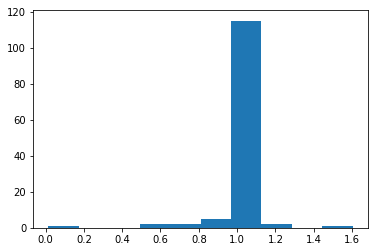

In [19]:
hist(np.sum(net_out, axis=1))

In [20]:
net_id

array([[ 0.32896236,  0.06774037, -0.5261674 , ..., -1.1526583 ,
        -0.16703285, -1.1350752 ],
       [-0.12764075,  0.2792887 , -0.0420969 , ..., -1.5465603 ,
        -0.05688022, -0.69259137],
       [-1.4567997 , -0.86307317, -1.2592809 , ...,  0.09078232,
         0.76111364, -3.2685854 ],
       ...,
       [ 0.11708695,  0.43958697,  0.15323375, ..., -1.3279767 ,
        -0.02258555, -0.9549487 ],
       [ 0.8547496 ,  2.3493319 ,  1.743664  , ...,  0.6761576 ,
         1.2538513 , -0.65895617],
       [ 1.7378442 ,  2.6785152 ,  2.271077  , ...,  0.06914189,
         1.2189438 , -1.4900796 ]], dtype=float32)

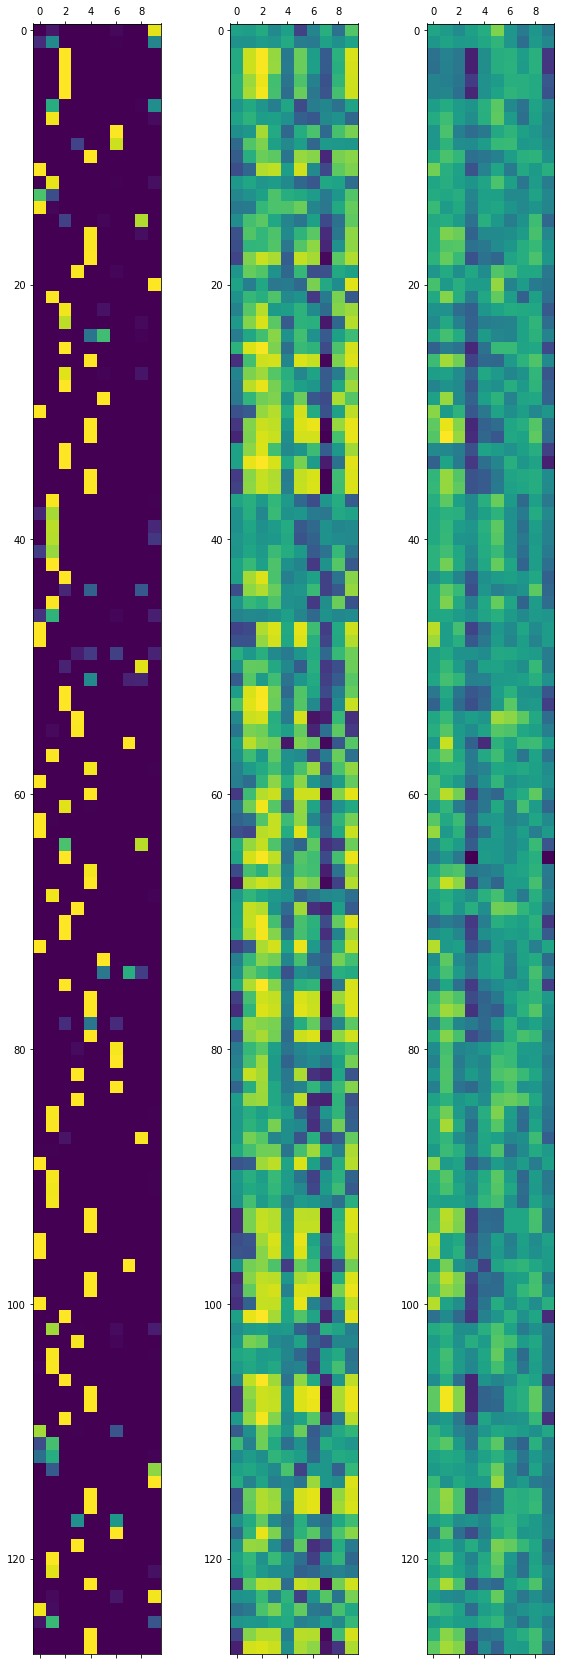

In [21]:
fig, (ax1, ax2, ax3) = subplots(1, 3, figsize=(10, 30))
ax1.matshow(net_out)
ax2.matshow(sigmoid)
ax3.matshow(net_id)

## predict hpa

In [22]:
hpa = np.load("./../../deeploc_multi/results/hpa_matrices.npz")

In [23]:
list(hpa)

['masks', 'encoded_seqs', 'identifiers']

In [24]:
hpa_uniprot = pd.read_csv("../../deeploc_multi/results_git/hpa_uniprot.tsv", sep="\t")
hpa_uniprot.head()

,status,subcellular_location,uniprot
0,Validated,Endoplasmic reticulum,NaN
1,Validated,Mitochondria,Q92934
2,Validated,Mitochondria,A0A024R562
3,Validated,Nucleoplasm,P52756
4,Validated,Nucleoplasm,E1CJT4


In [25]:
inputs.shape

(1195, 1000, 20)

In [26]:
traind['X_train'][1,1,:]

array([0.  , 0.48, 0.  , 0.  , 0.  , 0.29, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
      dtype=float32)

In [27]:
hpa['encoded_seqs'][0,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [26]:
err, net_out, alpha, context, sigmoid, net_id = val_fn(inputs[-128:], targets[-128:], in_masks[-128:])

In [27]:
predictions = np.zeros((hpa['encoded_seqs'].shape[0], 10))
for i in range(128, hpa['encoded_seqs'].shape[0], 128):
    err, net_out, alpha, context, sigmoid, net_id = val_fn(hpa['encoded_seqs'][i-128:i], targets[-128:], hpa['masks'][i-128:i])
    predictions[i-128:i] = net_out

In [28]:
np.save("./results/predictions_hpa.npy", predictions)

In [28]:
predictions = np.load("./results/predictions_hpa.npy")

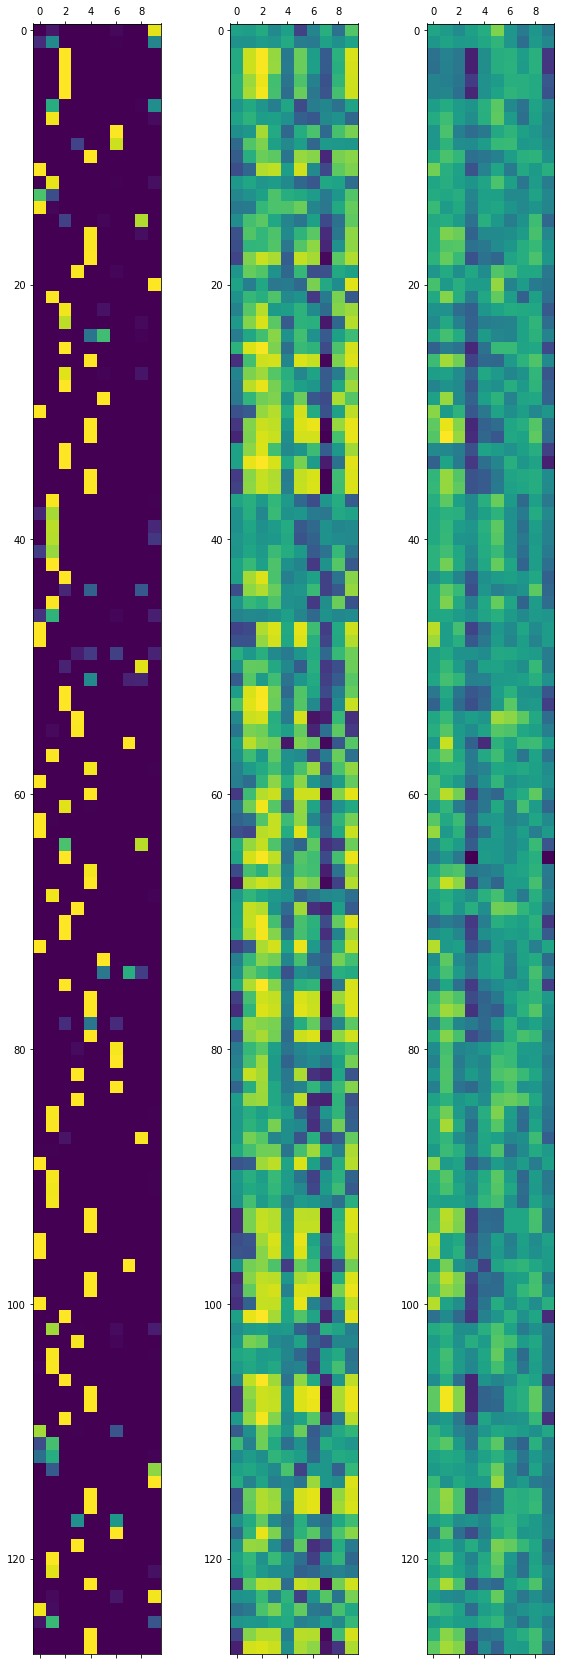

In [29]:
fig, (ax1, ax2, ax3) = subplots(1, 3, figsize=(10, 30))
ax1.matshow(net_out)
ax2.matshow(sigmoid)
ax3.matshow(net_id)

In [30]:
pred = pd.DataFrame({'uniprot': hpa['identifiers'], 'sum': np.sum(predictions, axis=1)})

In [31]:
pred = pred.merge(hpa_uniprot, how="inner", on=["uniprot"])

In [32]:
pred.head()

,sum,uniprot,status,subcellular_location
0,0.989549,Q92934,Validated,Mitochondria
1,0.989549,A0A024R562,Validated,Mitochondria
2,0.117196,P52756,Validated,Nucleoplasm
3,1.003529,E1CJT4,Validated,Nucleoplasm
4,0.117196,A0A024R2U6,Validated,Nucleoplasm


In [46]:
pred_group = pred.groupby(["uniprot", "sum"]).count().reset_index()
pred_group = pred_group.assign(n_loc=[str(x) for x in pred_group.status])

In [47]:
pred_group.head()

,uniprot,sum,status,subcellular_location,n_loc
0,A0A023T787,1.013415,1,1,1
1,A0A024QYT5,1.039034,1,1,1
2,A0A024QYT6,1.659145,2,2,2
3,A0A024QYT8,1.006584,2,2,2
4,A0A024QYU9,0.377447,1,1,1


In [48]:
from plotnine import *

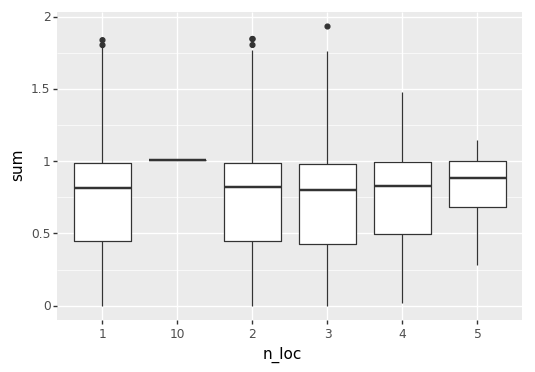

<ggplot: (8736867184181)>

In [49]:
ggplot(pred_group, aes(x="n_loc", y="sum")) + geom_boxplot()